# Import Libraries

In [4]:
# Core Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Load Datasets

In [5]:
# Function to load datasets from a specified folder
def load_csv_files_from_folder(folder_path):
    # Use glob to find all CSV files in the specified folder
    csv_files = glob.glob(folder_path + "/*.csv")
    # Load all datasets into a list of DataFrames
    data_frames = [pd.read_csv(file, delimiter=";") for file in csv_files]
    # Concatenate DataFrames into one and return it
    all_df = pd.concat(data_frames, ignore_index=True)
    # Convert the 'datetime' column from object to datetime format
    all_df['datetime'] = pd.to_datetime(all_df['datetime'])
    all_df.set_index('datetime', inplace=True)
    return all_df

In [6]:
# Anomaly Free
normal = load_csv_files_from_folder("data/anomaly-free")
# Load other experimental data
other_data = load_csv_files_from_folder("data/other") 
# Load valve1 data
valve1_data = load_csv_files_from_folder("data/valve1")  
# Load valve2 data
valve2_data = load_csv_files_from_folder("data/valve2") 

In [7]:
# valve1 + valve2
valve = pd.concat([valve2_data, valve1_data], ignore_index=True)

In [8]:
valve1_data.changepoint.value_counts()

changepoint
0.0    18097
1.0       63
Name: count, dtype: int64

In [9]:
other_data.head()

,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
datetime,,,,,,,,,,
2020-03-01 15:44:06,0.082065,0.133521,1.27794,0.054711,92.2562,22.2577,209.639,76.0197,0.0,0.0
2020-03-01 15:44:07,0.082724,0.132378,1.12118,-0.273216,92.0144,22.2577,221.250,76.9806,0.0,0.0
2020-03-01 15:44:08,0.081648,0.139038,1.93242,0.054711,92.2413,22.2748,236.615,76.0197,0.0,0.0
2020-03-01 15:44:09,0.083335,0.132742,1.25962,-0.273216,92.2438,22.2657,230.375,77.0000,0.0,0.0
2020-03-01 15:44:10,0.082272,0.133171,1.59773,0.054711,92.3611,22.2591,249.701,77.0000,0.0,0.0


In [10]:
other_data.tail()

,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
datetime,,,,,,,,,,
2020-02-08 17:47:14,0.239963,0.280118,2.72579,0.054711,86.3564,29.2586,235.798,126.632,0.0,0.0
2020-02-08 17:47:15,0.235336,0.275692,2.04216,-0.273216,86.3723,29.2590,236.322,127.375,0.0,0.0
2020-02-08 17:47:16,0.237740,0.273744,3.10246,0.054711,86.2211,29.2636,244.637,126.632,0.0,0.0
2020-02-08 17:47:17,0.240494,0.281168,1.98633,0.054711,85.9283,29.2621,236.094,126.687,0.0,0.0
2020-02-08 17:47:18,0.239064,0.279787,1.92621,0.054711,86.1260,29.2611,210.522,127.687,0.0,0.0


In [11]:
other_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14929 entries, 2020-03-01 15:44:06 to 2020-02-08 17:47:18
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Accelerometer1RMS    14929 non-null  float64
 1   Accelerometer2RMS    14929 non-null  float64
 2   Current              14929 non-null  float64
 3   Pressure             14929 non-null  float64
 4   Temperature          14929 non-null  float64
 5   Thermocouple         14929 non-null  float64
 6   Voltage              14929 non-null  float64
 7   Volume Flow RateRMS  14929 non-null  float64
 8   anomaly              14929 non-null  float64
 9   changepoint          14929 non-null  float64
dtypes: float64(10)
memory usage: 1.3 MB


In [12]:
other_data.describe()

,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,14929.000000,14929.000000,14929.000000,14929.000000,14929.000000,14929.000000,14929.000000,14929.000000,14929.000000,14929.000000
mean,0.230138,0.280673,2.203379,0.085221,87.264547,27.826756,228.490961,110.740401,0.351062,0.003349
std,0.141926,0.148826,0.595930,0.261459,1.858152,3.449011,10.978106,27.124952,0.477318,0.057777
min,0.015752,0.015505,0.149842,-1.257000,84.242000,22.020900,200.744000,0.555512,0.000000,0.000000
25%,0.082576,0.137296,1.803550,0.054711,85.842800,22.257700,222.354000,77.000000,0.000000,0.000000
50%,0.227904,0.272941,2.295070,0.054711,87.058900,29.385800,228.624000,126.309000,0.000000,0.000000
75%,0.244462,0.290920,2.687720,0.382638,88.444000,29.812100,234.788000,127.369000,1.000000,0.000000
max,0.722747,0.800498,3.318370,1.366420,95.011400,33.415100,254.611000,133.688000,1.000000,1.000000


# EDA

In [13]:
other_data["changepoint"].value_counts()

changepoint
0.0    14879
1.0       50
Name: count, dtype: int64

In [14]:
valve["changepoint"].value_counts()

changepoint
0.0    22393
1.0       79
Name: count, dtype: int64

 Imbalnce changepoint fearure may cause alot of problems like Overfitting,Difficulty in Learning,Difficulty in Learning and Poor Recall and F1-Score,

<Axes: xlabel='Current', ylabel='Pressure'>

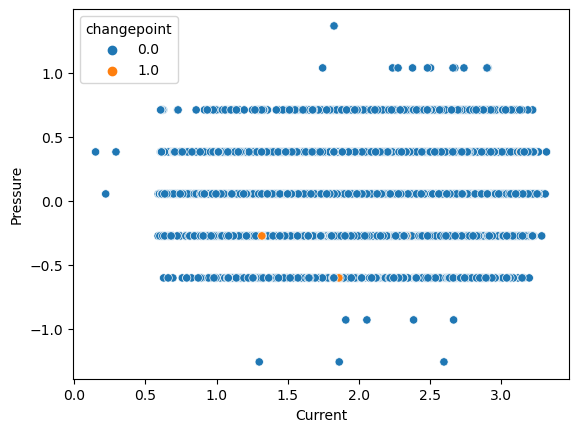

In [15]:
sns.scatterplot(data=other_data,x="Current",y="Pressure",hue="changepoint")

<Axes: xlabel='Current', ylabel='Voltage'>

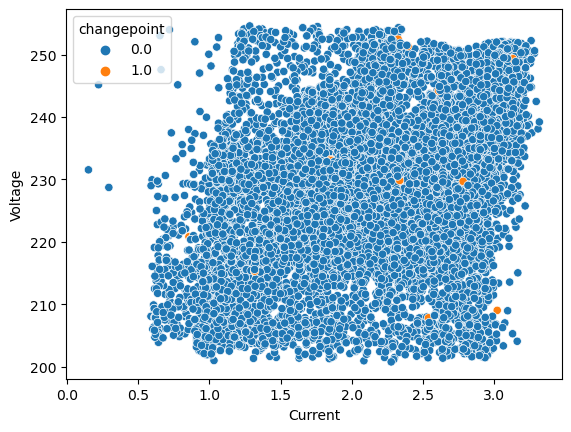

In [16]:
sns.scatterplot(data=other_data,x="Current",y="Voltage",hue="changepoint")

<Axes: xlabel='Volume Flow RateRMS', ylabel='Thermocouple'>

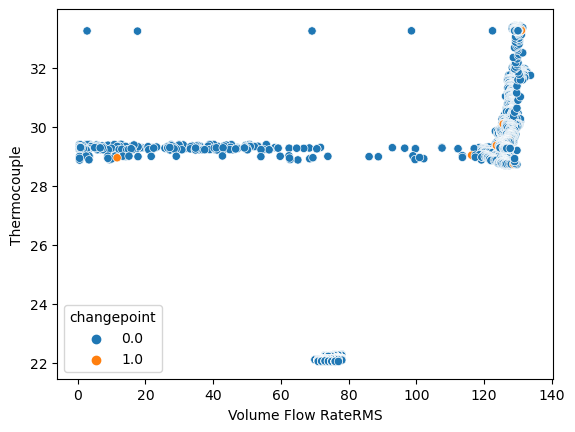

In [17]:
sns.scatterplot(data=other_data,x="Volume Flow RateRMS",y="Thermocouple",hue="changepoint")

<Axes: >

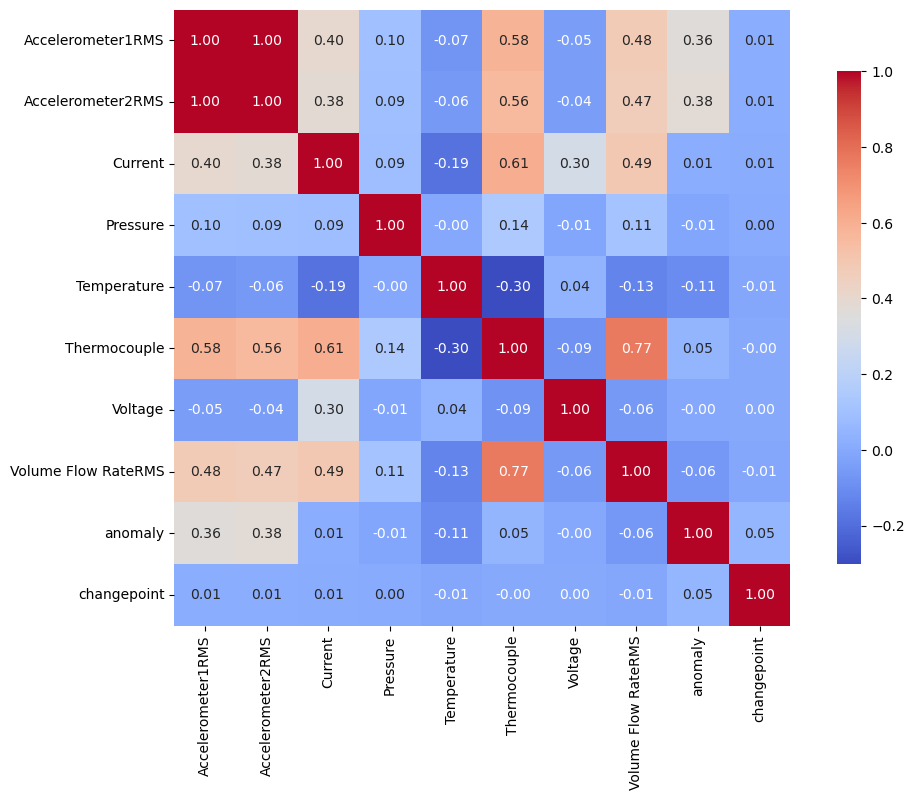

In [18]:
# Create a heatmap with annotations
plt.figure(figsize=(12, 8))
corr_matrix = other_data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

In [19]:
# sns.pairplot(data=other_data)

# Splitting Data 

In [20]:
from sklearn.model_selection import train_test_split

### Oher Data

In [260]:
X = other_data.iloc[...,:-1].values
y = other_data.iloc[...,-1].values

In [261]:
# pip install scikit-learn==1.2.2

### Shuffling Data

In [308]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

# Data Norm

In [325]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Build and Test Model

In [326]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def evaluate_model(y_test, y_pred, labels=[1, -1]):
    """
    Function to calculate and print evaluation metrics for a model.

    Parameters:
    - y_test: True labels (ground truth)
    - y_pred: Predicted labels by the model
    - labels: The labels for confusion matrix (default is [1, -1])

    Returns:
    - Confusion matrix, accuracy, and classification report.
    """
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    print("Confusion Matrix:\n", cm, end="\n")
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    
    # Print classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)


### Isolation Forest

In [327]:
from sklearn.ensemble import IsolationForest
import pandas as pd


model = IsolationForest(n_estimators=24, contamination=0.001, random_state=42)
# model.fit(X_train_scaled) 
model.fit(X_train)

IsolationForest(contamination=0.001, n_estimators=24, random_state=42)

In [328]:
# y_pred = model.predict(X_test_scaled)
y_pred = model.predict(X_test)

In [329]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [330]:
y_test_ = [-1 if x == 1 else 1 for x in y_test] 
# y_test_

In [331]:
evaluate_model(y_test_,y_pred)

Confusion Matrix:
 [[4908    8]
 [4905    0]]
Accuracy: 0.4997454434375318
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      4905
           1       0.50      1.00      0.67      4916

    accuracy                           0.50      9821
   macro avg       0.25      0.50      0.33      9821
weighted avg       0.25      0.50      0.33      9821



### Local Outlier Factor

In [332]:
from sklearn.neighbors import LocalOutlierFactor

model = LocalOutlierFactor(n_neighbors=12, contamination=0.01, metric='manhattan')
model.fit(X_train)

LocalOutlierFactor(contamination=0.01, metric='manhattan', n_neighbors=12)

In [333]:
y_pred = model.fit_predict(X_test) 

In [334]:
evaluate_model(y_test_,y_pred)

Confusion Matrix:
 [[4832   84]
 [4890   15]]
Accuracy: 0.49353426331330824
Classification Report:
              precision    recall  f1-score   support

          -1       0.15      0.00      0.01      4905
           1       0.50      0.98      0.66      4916

    accuracy                           0.49      9821
   macro avg       0.32      0.49      0.33      9821
weighted avg       0.32      0.49      0.33      9821



## Xgboost

In [340]:
import xgboost as xgb

In [390]:
# Initialize XGBoost classifier
model = xgb.XGBClassifier(n_estimators=15, learning_rate=0.001, random_state=42)

# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=15, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [391]:
# Predict on the test data
y_pred = model.predict(X_test)

In [392]:
# Evaluate the model
evaluate_model(y_test, y_pred,[1,0])

Confusion Matrix:
 [[4826   79]
 [1034 3882]]
Accuracy: 0.8866714183891661
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.79      0.87      4916
         1.0       0.82      0.98      0.90      4905

    accuracy                           0.89      9821
   macro avg       0.90      0.89      0.89      9821
weighted avg       0.90      0.89      0.89      9821



## One-Class SVM

In [289]:
from sklearn.svm import OneClassSVM

In [290]:
# One-Class SVM Model
model = OneClassSVM(kernel='rbf', gamma='scale', nu=0.1)  # Adjust `nu` based on your dataset
model.fit(X_train)

OneClassSVM(nu=0.1)

In [291]:
y_pred_test = model.predict(X_test)

In [292]:
y_pred_test_binary = [1 if pred == -1 else 0 for pred in y_pred_test]

In [293]:
# Evaluate the Model
evaluate_model(y_test, y_pred_test_binary)

Confusion Matrix:
 [[546   0]
 [  0   0]]
Accuracy: 0.5140006109357499
Classification Report:
              precision    recall  f1-score   support

         0.0       0.51      0.92      0.65      4916
         1.0       0.57      0.11      0.19      4905

    accuracy                           0.51      9821
   macro avg       0.54      0.51      0.42      9821
weighted avg       0.54      0.51      0.42      9821



### RNN and LSTM

In [116]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Add
from tensorflow.keras.models import Model

# Input layer
input_layer = Input(shape=(9, 1))

# LSTM layers
lstm1 = LSTM(256, activation='relu', return_sequences=True)(input_layer)  # First LSTM layer (adjusted to 256 units)
lstm2 = LSTM(256, activation='relu', return_sequences=True)(lstm1)        # Second LSTM layer

# Skip connection: Add output of lstm1 to lstm2
skip_connection = Add()([lstm1, lstm2])

# Third LSTM layer (with skip connection)
lstm3 = LSTM(128, activation='relu', return_sequences=False)(skip_connection)

# Output layer
output_layer = Dense(1, activation='sigmoid')(lstm3)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32)



Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 9, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_6 (LSTM)                 │ (None, 9, 256)            │         264,192 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_7 (LSTM)                 │ (None, 9, 256)            │         525,312 │ lstm_6[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_2 (Add)                   │ (None, 9, 256)            │               0 │ lstm_6[0][0], lstm_7[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_8 (LSTM)                 │ (None, 128)               │         197,120 │ add_2[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 1)                 │             129 │ lstm_8[0][0]               │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 986,753 (3.76 MB)

 Trainable params: 986,753 (3.76 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.5028 - loss: 0.7246
Epoch 2/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.5075 - loss: 0.6921
Epoch 3/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.6577 - loss: 0.6119
Epoch 4/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.8050 - loss: 0.4295
Epoch 5/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.8254 - loss: 0.3708
Epoch 6/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.8384 - loss: 0.3474
Epoch 7/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.8513 - loss: 0.3243
Epoch 8/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.8563 - loss: 0.3070
Epoch 9/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.8642 - loss: 0.2866
Epoch 10/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.8676 - loss: 0.2755
Epoch 11/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.8759 - loss: 0.2567
Epoch 12/30
624/624 ━━━━━━━━━━

In [117]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

307/307 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step


In [118]:
evaluate_model(y_test,y_pred_binary,[1,0])

Confusion Matrix:
 [[4660  245]
 [ 334 4582]]
Accuracy: 0.9410447001323694
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      4916
         1.0       0.93      0.95      0.94      4905

    accuracy                           0.94      9821
   macro avg       0.94      0.94      0.94      9821
weighted avg       0.94      0.94      0.94      9821



# Deployment

In [393]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

### Evaluate the model on valve

In [394]:
# Load the saved model using pickle
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

### Valve1 Data

In [395]:
X_val1 = valve1_data.iloc[...,:-1].values
y_val1 = valve1_data.iloc[...,-1].values
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_val1, y_val1)

In [396]:
y_pred_prob1 = model.predict(X_resampled) 
# y_pred_val1 = (y_pred_prob1 > 0.5).astype(int)

In [397]:
# y_pred_val1

In [398]:
# y_val_ = [1 if x == 0 else -1 for x in y_val]

In [399]:
evaluate_model(y_resampled,y_pred_prob1,[1,0])

Confusion Matrix:
 [[15124  2973]
 [ 5222 12875]]
Accuracy: 0.773581256561861
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.71      0.76     18097
         1.0       0.74      0.84      0.79     18097

    accuracy                           0.77     36194
   macro avg       0.78      0.77      0.77     36194
weighted avg       0.78      0.77      0.77     36194



### Valve2 Data

In [400]:
X_val2 = valve2_data.iloc[...,:-1].values
y_val2 = valve2_data.iloc[...,-1].values
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_val2, y_val2)

In [401]:
y_pred_prob2 = model.predict(X_resampled)
y_pred_val2 = (y_pred_prob2 > 0.5).astype(int)

In [402]:
evaluate_model(y_resampled,y_pred_val2,[1,0])

Confusion Matrix:
 [[3600  696]
 [1245 3051]]
Accuracy: 0.7740921787709497
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.71      0.76      4296
         1.0       0.74      0.84      0.79      4296

    accuracy                           0.77      8592
   macro avg       0.78      0.77      0.77      8592
weighted avg       0.78      0.77      0.77      8592

